## Аналитика в авиакомпании

### Описание проекта:

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### 1.Импортируем файлы и изучим данные в них

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

- #### Количество рейсов для каждой модели самолета:

In [2]:
flights_amount = pd.read_csv('/datasets/query_1.csv')

In [3]:
flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
flights_amount

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
flights_amount.duplicated().sum()

0

- #### Cреднее количество рейсов в день, прибывших в разные города за сентябрь 2018 года:

In [6]:
average_flights = pd.read_csv('/datasets/query_3.csv')

In [7]:
average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
average_flights.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


In [9]:
average_flights.duplicated().sum()

0

- #### Количество проданных билетов за неделю с информацией о фестивале, если он был:

In [10]:
ticket_amount_per_week = pd.read_csv('/datasets/query_last.csv')

In [11]:
ticket_amount_per_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [12]:
ticket_amount_per_week

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


### Вывод

В целом с данными все в порядке. Необходимо только заменить типы данных и округлить некоторые значения в:

- в таблице average_flights округлить значения до двух знаков после запятой;

- в таблице ticket_amount_per_week перевести festival_week в int;

- для удобства чтения заменить NaN в festival_name на 'no_festival'.

### 2.Замена типа данных

In [13]:
# Округлим данные до целых значений, чтобы при переводе в целочисленный тип не потерять данные
average_flights = average_flights.round({'average_flights':0})

In [14]:
average_flights['average_flights'] = average_flights['average_flights'].astype('int64')

In [15]:
average_flights.head()

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2


In [16]:
ticket_amount_per_week = ticket_amount_per_week.fillna(0)

In [17]:
ticket_amount_per_week['festival_week'] = ticket_amount_per_week['festival_week'].astype('int64')

In [18]:
ticket_amount_per_week

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,0
3,33,51378,0,0
4,34,51492,0,0
5,35,51360,0,0
6,36,51386,36,Видфест
7,37,51670,0,0
8,38,51518,0,0
9,39,51623,0,0


In [19]:
ticket_amount_per_week['festival_name'] = ticket_amount_per_week['festival_name'].replace(0, 'no_festival')

In [20]:
ticket_amount_per_week

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,no_festival
3,33,51378,0,no_festival
4,34,51492,0,no_festival
5,35,51360,0,no_festival
6,36,51386,36,Видфест
7,37,51670,0,no_festival
8,38,51518,0,no_festival
9,39,51623,0,no_festival


### Вывод

Тип данных измененен. Перейдем к построению графиков.

### 3.Графики

Необходимо:

- выбрать топ-10 городов по количеству рейсов;

- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

- сделать выводы по каждому из графиков, пояснить результат.

- #### Модели самолетов и количество рейсов:

In [21]:
flights_amount_sort = flights_amount.sort_values(by ='flights_amount', ascending=False)

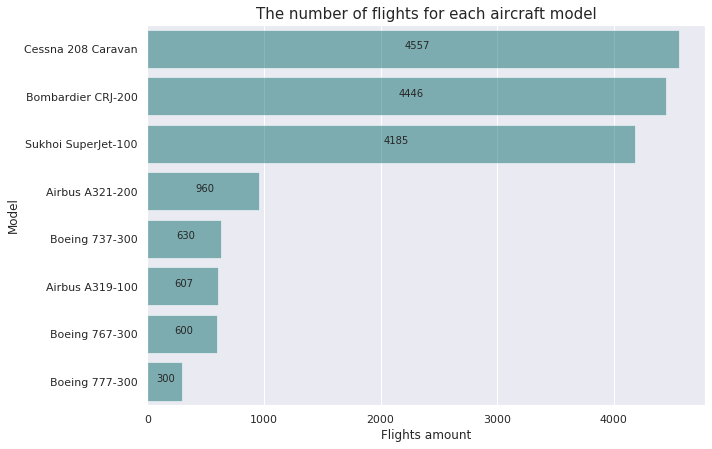

In [22]:
sns.set()
sns.set(rc={'figure.figsize':(10,7)})

sns.barplot(data=flights_amount_sort,
            x='flights_amount',
            y='model',
            color = 'teal', alpha = 0.5)

plt.title("The number of flights for each aircraft model", fontsize=15)
plt.xlabel('Flights amount', fontsize = 12)
plt.ylabel('Model', fontsize = 12)

for i, val in enumerate(flights_amount_sort['flights_amount'].values):
    plt.text((val / 2) - 70, i, int(val),
             fontdict={'fontweight':500, 'size':10})

#### Вывод

- Первы три модели самолета Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi Superjet-100 представляют собой небольшие самолеты с максимальным числом посадочных мест от 9 до 100 (Cessna 208 Caravan - 9-13 мест, Bombardier CRJ-200 - 50 мест, Sukhoi Superjet-100 - 95-98 мест) и максимальной дальностью полета от 1700 км до 3000 км.


- Поскольку такие самолеты в основном используются на авиалиниях протяженностью до 3000 км и время полета составляет от 1,5 до 4,5 часов, они могут совершать несколько рейсов в день. За счет этого, вероятно, число рейсов для этих самолетов значительно больше, чем у самолетов, которые рассчитаны для полетов на более дальние расстояния - от 5000 км до 15000 км. К таким самолетам относятся Airbus A321, Boeing 767-300 или Boeing 777-300. 

- #### Города и среднее количество рейсов в день:

In [23]:
average_flights_sort = average_flights.sort_values(by = 'average_flights', ascending = False)

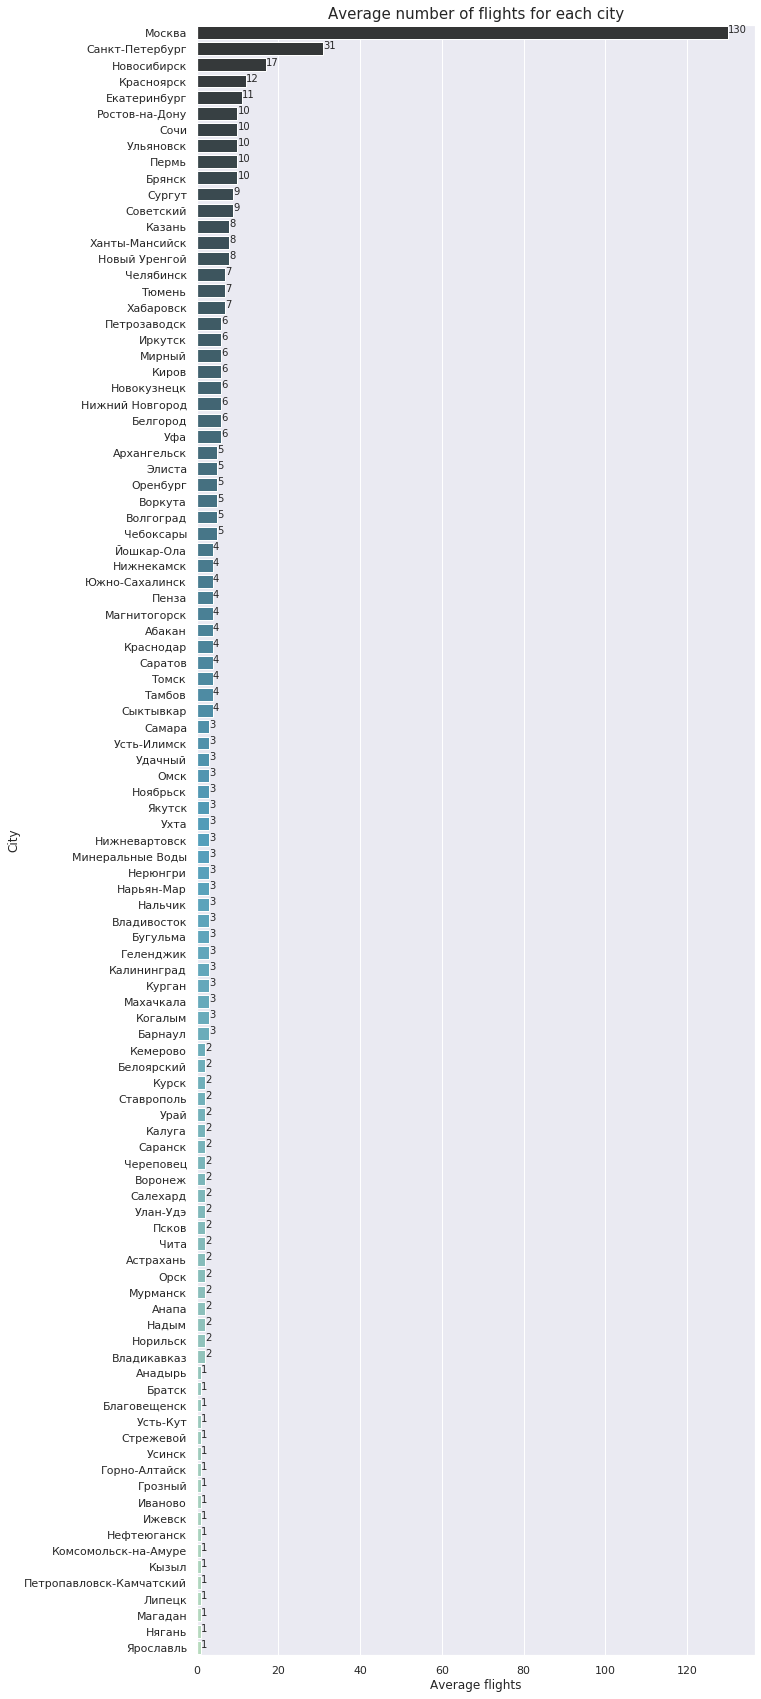

In [24]:
sns.set()
sns.set(rc={'figure.figsize':(10,30)})

sns.barplot(data=average_flights_sort,
            x='average_flights',
            y='city',
            palette = 'GnBu_d')

plt.title("Average number of flights for each city", fontsize=15)
plt.xlabel('Average flights', fontsize = 12)
plt.ylabel('City', fontsize = 12)

for i, val in enumerate(average_flights_sort['average_flights'].values):
    plt.text(val, i, int(val),
             fontdict={'fontweight':500, 'size':10})

#### Вывод

- Москва является лидером по числу прибывающих рейсов в день. Среднее количество таких рейсов ~130 в день.

    Это объясняется тем, что в Москве несколько аэропортов(4 основных), один из которых - аэропорт Шереметьево - является одним из самых крупных международных аэропортов России и Европы. Является пунктом пересадки пассажиров и имеет высокий процент стыковочных рейсов. Плюс данный аэропорт является хабом для авивкомпании Аэрофлот, которая совершает десятки рейсов в день как региональных, так и международных.
    
    
- Число прибывающих рейсов в другие города значительно меньше. Можно предположить, что число рейсов зависит не только от площади аэропорта, но и от дальности полета - чем дальше город от Центрального региона, тем количество рейсов меньше.
 

- #### Топ-10 городов и среднее количество рейсов в день:

In [25]:
city_top10 = average_flights.sort_values(by = 'average_flights', ascending = False).reset_index(drop = True).head(10)
city_top10

,city,average_flights
0,Москва,130
1,Санкт-Петербург,31
2,Новосибирск,17
3,Красноярск,12
4,Екатеринбург,11
5,Ростов-на-Дону,10
6,Сочи,10
7,Ульяновск,10
8,Пермь,10
9,Брянск,10


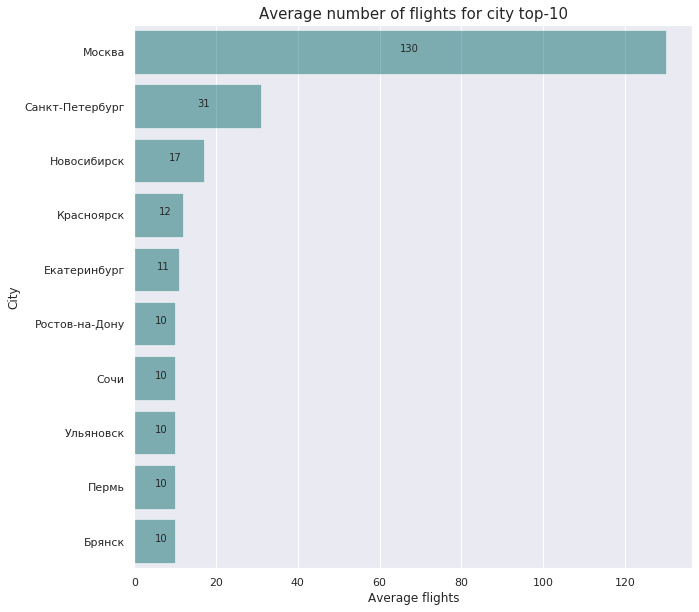

In [26]:
sns.set()
sns.set(rc={'figure.figsize':(10,10)})

sns.barplot(data=city_top10,
            x='average_flights',
            y='city',
            color = 'teal', alpha = 0.5)

plt.title("Average number of flights for city top-10", fontsize=15)
plt.xlabel('Average flights', fontsize = 12)
plt.ylabel('City', fontsize = 12)

for i, val in enumerate(city_top10['average_flights'].values):
    plt.text((val / 2), i, int(val),
             fontdict={'fontweight':500, 'size':10})

#### Вывод

- На количество рейсов может влиять и привлекательность города с точки зрения туризма. Так, Москву в 2018 году посетили ~23 млн.человек, а СПб - ~8 млн.человек. 

    Плюс ко всему, в 2018 году в России проходил чемпионат мира по футболу. И в нашей первой десятке городов есть те, которые принимали матчи чемпионата. Например, Мск, СПб, Екатеринбург, Ростов, Сочи. 


### 4.Проверка гипотезы

In [27]:
ticket_amount_per_week

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,no_festival
3,33,51378,0,no_festival
4,34,51492,0,no_festival
5,35,51360,0,no_festival
6,36,51386,36,Видфест
7,37,51670,0,no_festival
8,38,51518,0,no_festival
9,39,51623,0,no_festival


- __Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.__

Сформулируем нулевую и альтернативную гипотезы:

Н0 - Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время равны;

Н1 - Средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время не равны.

Для проверки гипотезы применим метод __scipy.stats.ttest_ind().__

Уровень статистической значимости зададим 1%.

In [28]:
# Срезы данных
no_fest = ticket_amount_per_week.query('festival_name == "no_festival"')['ticket_amount']
fest = ticket_amount_per_week.query('festival_name != "no_festival"')['ticket_amount']

In [29]:
alpha = .01

results = st.ttest_ind(no_fest, fest)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


Проверим, действительно ли средние значения равны.

In [30]:
no_fest_proverka = ticket_amount_per_week.query('festival_name == "no_festival"')

In [31]:
no_fest_proverka.groupby('festival_name')['ticket_amount'].mean()

festival_name
no_festival    51530.857143
Name: ticket_amount, dtype: float64

In [32]:
fest_proverka = ticket_amount_per_week.query('festival_name != "no_festival"')

In [33]:
fest_proverka['ticket_amount'].sum() / fest_proverka['ticket_amount'].count()

48662.666666666664

#### Вывод

- Не получилось отвергнуть гипотезу о равенстве спроса на билеты во время фестиваля и спроса на билеты в обычное время.
Однако данных может быть недостаточно, чтобы сделать правильные и точные выводы, так как в выборках всего по 3 и 7 наблюдений.


- Также может иметь значение и масштаб фестиваля, насколько он известен/популярен, сколько человек вмещает и тп., чтобы можно было сравнить спрос на билеты во время фестиваля и в обычное время.

### Вывод

- Количество рейсов, которое совершает каждая модель самолета, зависит от количества пассажиромест и дальности полета.

    Так, самолеты, рассчитанные на полеты на расстояние до 3000 км, нассчитывают больше 4000 рейсов за сентябрь 2018 года.
    
    Когда как более крупные самолеты (Airbus, Boeing) совершают в среднем ~ 600 рейсов.
 
 
- Если смотреть на среднее количество рейсов в день в разрезе городов, то больше всего прибывающих рейсов принимают аэропорты Москвы ~ 130 в день. 

    Также, можно предположить, что количество рейсов в день зависит от дальности полета - чем дальше город от Центрального региона, тем количество рейсов меньше.
    

- Число прибывающих рейсов в день может быть связано не только с количеством аэропортов, их площадью, но и с привлекательностью города для туристов, проведением различных мероприятий (например, чемпионата мира по футболу, как было в 2018 году).


- Не удалось отвергнуть гипотезу о том, что средний спрос на билеты во время фестивалей и средний спрос на билеты в обычное время равны. 